In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from dataset import *

## Load Data

#### Load raw data from pickle file

In [2]:
data = load_pickle('../Data/Dataset_4subjects_Exe_Obs')

#### Select participant and session

In [3]:
session = data['s6']['sess1']

## Separate into trials

In [ ]:
## Old functions, might still be useful
def get_trials(session_data, channel, fps):
    '''
    Get the trials from the session data for a given channel.
    
    Parameters:
    - session_data: dict, the data of a session.
    - channel: int, the index of the channel.
    - fps: int, the sampling rate of the data.
    
    Returns:
    - trials: list of 1D NumPy arrays, the trials.
    '''
    
    trial_starts = session_data['trials_info']['TS_TrialStart']
    trial_end = session_data['trials_info']['TS_HandBack']
    trials = {f"trial_{i}":session_data['neural_data'][channel][int(trial_starts[i]) * fps:int(trial_end[i]) * fps] for i in range(len(trial_starts))}
    return trials

def separate_trials (session_data, fps=2048) :
    '''
    Separate trials from the session data for all channels.
    
    Parameters:
    - session_data: dict, the data of a session.
    - fps: int, the sampling rate of the data.
    
    Returns:
    - session_data: dict, the input dictionnary with an new trial key that stores the timepoints for each trial.
    '''
    trial_dict = {f'channel_{channel}': get_trials(session_data, channel, fps = fps) for channel in range(len(session_data['channel_labels']))}
    session_data['trials'] = trial_dict
    return session_data

In [ ]:
def get_trials(session_data, fps):
    '''
    Get the trials from the session data.
    
    Parameters:
    - session_data: dict, the data of a session.
    - fps: int, the sampling rate of the data.
    
    Returns:
    - trials: list of 2D NumPy arrays, each element in the list is an array with the timeseries of the trial in each channel.
    '''
    trial_starts = session_data['trials_info']['TS_TrialStart']
    trial_end = session_data['trials_info']['TS_HandBack']
    trials = []
    for i in range(len(trial_starts)):
        trials.append(session_data['neural_data'][:,int(trial_starts[i]) * fps:int(trial_end[i]) * fps])
    return trials

In [5]:
trials = get_trials(session, 2048) #list of trials each containing an array with the timeseries of that trial for each channel.

In [101]:
channel_id = 0
fps = 2048

def get_mean_baseline_and_activity (session_data, channel_id, fps=2048):

    trial_starts = session_data['trials_info']['TS_TrialStart']
    trial_action = session_data['trials_info']['TS_ObjectGrasp']
    errors = np.array(session_data['trials_info']['ErrorCode']) == 0


    channel_ts = session_data['neural_data'][channel_id]
    channel_baselines = []
    channel_actions = []
    for i in range(len(trial_starts)):
        channel_baselines.append(channel_ts[int((trial_starts[i]) * fps):int((trial_starts[i] + 1) * fps)])
        if errors[i]:
            channel_actions.append(channel_ts[int((trial_action[i] - 0.5) * fps):int((trial_action[i] + 0.5) * fps)])
        
    mean_baseline = np.array(channel_baselines).mean(axis=0)
    mean_action = np.array(channel_actions).mean(axis=0)
    
    return mean_baseline, mean_action

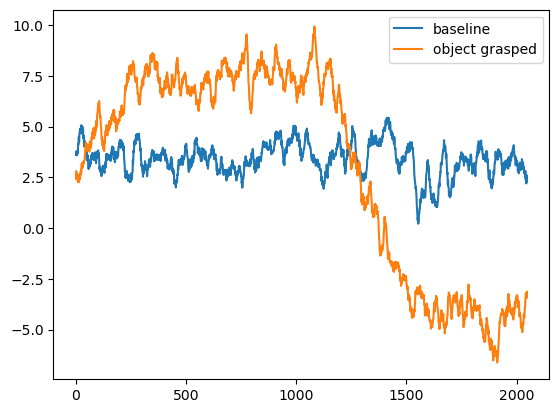

In [115]:
mean_baseline, mean_activity = get_mean_baseline_and_activity(session,2)

plt.plot(mean_baseline)
plt.plot(mean_activity)
plt.legend(['baseline','object grasped'])
plt.show()